<a href="https://colab.research.google.com/github/hanshil09/Brain-Tumor-Detection-AI-Model/blob/main/Brain_tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import get_ipython
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [9]:
#extracting the data
!unzip /content/BrainTumorDataSet.zip

Archive:  /content/BrainTumorDataSet.zip
   creating: Brain Tumor Data Set/Brain Tumor/
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1005).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1006).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1007).jpg  
  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os #helps creating and deleting the folders
import math
import shutil #move the file
import glob # no need to import whole path of image

In [10]:
#counting numbert of images in each classes
# 0 brain tumor and 1 as Healthy brain
root_dir="/content/Brain Tumor Data Set"
number_of_images={}
for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))





In [11]:
number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

#Split the data now
* 70% goes for training
* 15% goes for Validation
* 15% goes for testing

In [12]:
def dataFolder(path, split):
      if not os.path.exists("./"+path):
       os.mkdir("./"+path)
       for dir in os.listdir(root_dir):
        os.makedirs("./"+path+"/"+dir)

        num_images_in_dir = len(os.listdir(os.path.join(root_dir,dir)))
        num_images_to_select = math.floor(split*number_of_images[dir])-5


        for img in np.random.choice(a=os.listdir(os.path.join(root_dir,dir)),
                                    size=num_images_to_select,
                                    replace=False):
          o = os.path.join(root_dir,dir,img)#path
          d=os.path.join("./"+path,dir)#destination to train
          # The following line had a bug. shutil.copy copies a file from source to destination, and the user was providing an integer as source, and a directory as destination
          #This was changed to use shutil.copy(o,d)
          shutil.copy(o,d)
          os.remove(o)
      else:
        print(f"{path} folder exists")

In [13]:
dataFolder("train", 0.7)

In [14]:
dataFolder("testing", 0.15)

In [15]:

dataFolder("validation", 0.15)

In [16]:
number_of_images={}
for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))

number_of_images.items()

dict_items([('Healthy', 16), ('Brain Tumor', 17)])

#Model building


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D, Input
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import os

In [18]:
# Convulation Nueral Network Model

#features of image
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#image data deacreases at the rate of 25%
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

Making function to prepare the data for data generator


In [20]:
def preprocessingfortrain(path):
  # input will be the path
  # output will be the pre processed images
  image_data=ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)#data augmentation
  image = image_data.flow_from_directory(directory= path, target_size=(128,128), batch_size= 32, class_mode='binary')
  return image
path = "/content/train"
train_data = preprocessingfortrain(path)

Found 3209 images belonging to 2 classes.


Exceuting the function

In [21]:
path = "/content/train"
train_data = preprocessingfortrain(path)


Found 3209 images belonging to 2 classes.


In [26]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [23]:
def preprocessingforOther(path):
  # input will be the path
  # output will be the pre processed images
  image_data=ImageDataGenerator(rescale=1/255)
  # change target_size to (128,128) from (128,)
  image = image_data.flow_from_directory(directory= path, target_size=(128,128), batch_size= 32, class_mode='binary')
  return image

In [24]:
path = "/content/testing"
test_data = preprocessingforOther(path)


Found 679 images belonging to 2 classes.


In [25]:

path = "/content/validation"
val_data = preprocessingforOther(path)

Found 679 images belonging to 2 classes.


In [27]:
# Model architecture
IMAGE_SIZE = 128  # Image size (adjust based on your requirements)
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze all layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Set the last few layers of the VGG16 base model to be trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Build the final model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))  # Input layer
model.add(base_model)  # Add VGG16 base model
model.add(Flatten())  # Flatten the output of the base model
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(Dropout(0.2))  # Dropout layer for regularization
# Define train_dir
train_dir = "/content/train"
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Parameters
batch_size = 20
#The following two lines of code also have errors. We will comment out this code, since it's not used immediately.
#steps = int(len(train_paths) / batch_size)  # Steps per epoch
epochs = 5
# Train the model
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data = val_data) # Added validation_data here

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 918s 9s/step - loss: 0.5615 - sparse_categorical_accuracy: 0.7132 - val_loss: 0.1865 - val_sparse_categorical_accuracy: 0.9146
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 907s 9s/step - loss: 0.2145 - sparse_categorical_accuracy: 0.9186 - val_loss: 0.0957 - val_sparse_categorical_accuracy: 0.9661
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 907s 9s/step - loss: 0.1304 - sparse_categorical_accuracy: 0.9501 - val_loss: 0.1032 - val_sparse_categorical_accuracy: 0.9647
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 903s 9s/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9652 - val_loss: 0.0582 - val_sparse_categorical_accuracy: 0.9809
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 902s 9s/step - loss: 0.0700 - sparse_categorical_accuracy: 0.9729 - val_loss: 0.0951 - val_sparse_categorical_accuracy: 0.9705


#Model Training

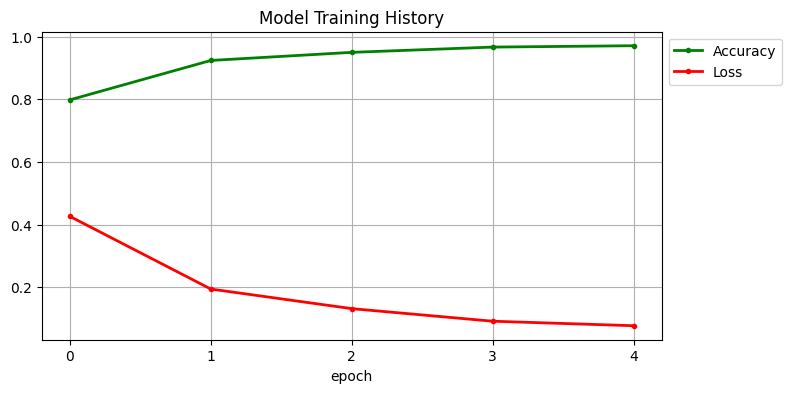

In [28]:

plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

def load_and_preprocess_images(path, target_size=(224, 224), batch_size=32):
  """Loads and preprocesses images from a directory using ImageDataGenerator."""
  image_data = ImageDataGenerator(rescale=1/255) # rescale pixel values to [0,1]
  images = image_data.flow_from_directory(
      directory=path,
      target_size=target_size,
      batch_size=batch_size,
      class_mode='binary',
      shuffle = False # turn off shuffling, so that the class labels are ordered.
  )
  return images


#Model Confusion

Found 679 images belonging to 2 classes.
22/22 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step
Confusion Matrix:
[[368   3]
 [ 25 283]]


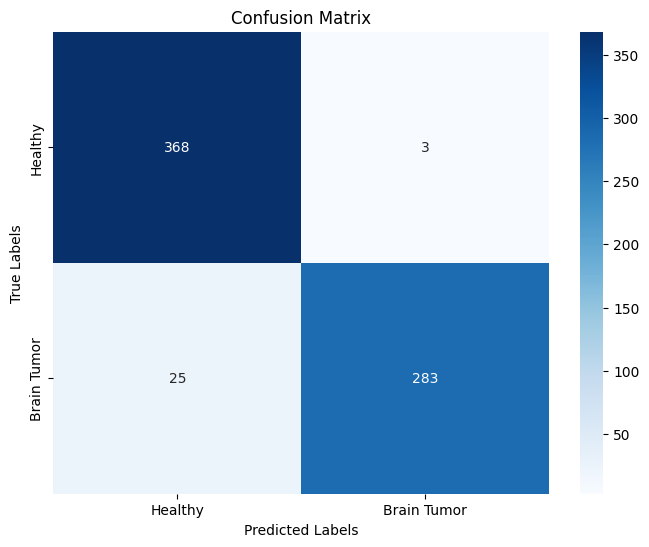

In [32]:
# Load and preprocess test data
path = "/content/testing"
test_data = load_and_preprocess_images(path, target_size=(128, 128), batch_size=32)

# Get the true labels from the test data generator
test_labels_encoded = test_data.classes

# Get the model's predictions on the test data
test_predictions = model.predict(test_data)


# 3. Confusion Matrix
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=os.listdir(train_dir), yticklabels=os.listdir(train_dir))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ROC Curve and AUC

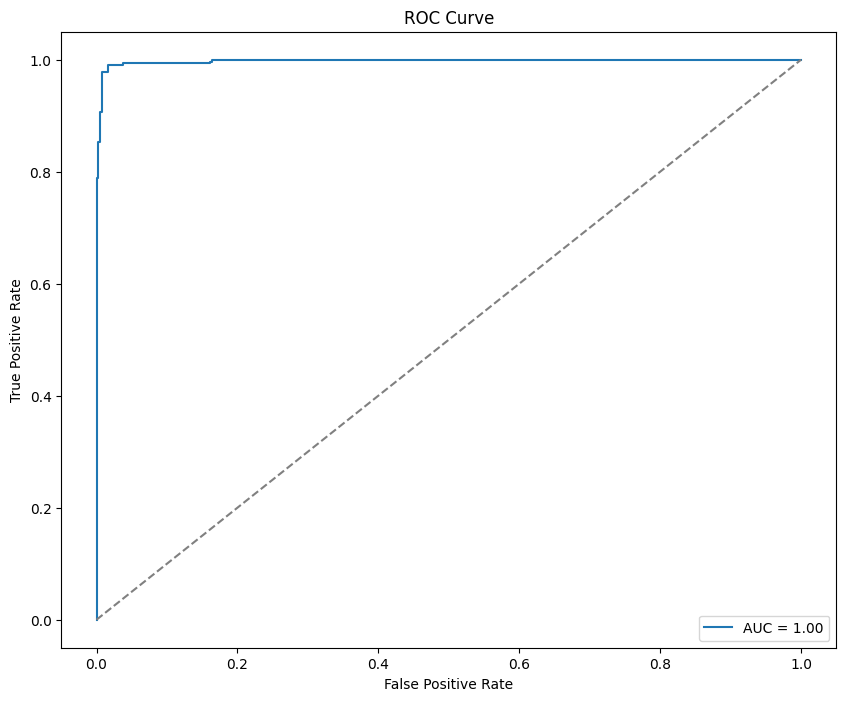

In [37]:
# Pass the probability of the positive class to roc_curve
fpr, tpr, _ = roc_curve(test_labels_encoded, test_predictions[:, 1])
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure(figsize=(10, 8))
#for i in range(len(os.listdir(train_dir))):
#    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [38]:
# Save the entire model
model.save('model.h5')
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('model.h5')

#MRI detection model


In [39]:
acc = model.evaluate(test_data)[1]
print(f"Accuracy of the model is ={acc*100} %")

22/22 ━━━━━━━━━━━━━━━━━━━━ 132s 6s/step - loss: 0.0392 - sparse_categorical_accuracy: 0.9847
Accuracy of the model is =95.87628841400146 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Tumor Detected


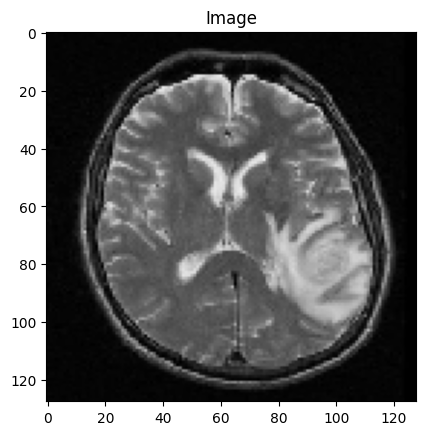

In [56]:
from tensorflow.keras.preprocessing import image as keras_image
path = "/content/testing/Brain Tumor/Cancer (998).JPG"
img = keras_image.load_img(path, target_size=(128,128)) # Changed target_size to (128,128)

i = keras_image.img_to_array(img)/255
input_arr= np.array([i])
input_arr.shape

pred =np.argmax(model.predict(input_arr))

if pred==0:
 print("Tumor Detected")
else:
  print("Healthy Brain")

plt.imshow(input_arr[0])
plt.title("Image")
plt.show()

MessageError: Error: credential propagation was unsuccessful